In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [4]:
dataset=MNIST(root='data/',download=True)

In [5]:
len(dataset)

60000

In [6]:
test_dataset=MNIST(root='data/',train=False)

In [7]:
len(test_dataset)

10000

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
image,label=dataset[0]

label 5


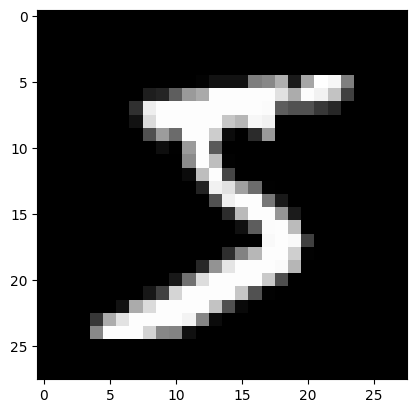

In [10]:
plt.imshow(image,cmap='gray')
print('label',label)

label 1


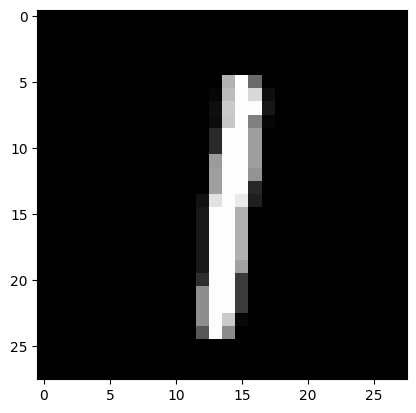

In [11]:
image,label=dataset[40]
plt.imshow(image,cmap='gray')
print('label',label)

In [13]:
import torchvision.transforms as transforms
dataset=MNIST(root='data/',train=True,transform=transforms.ToTensor())

In [14]:
img_tensor,label=dataset[0]
print(img_tensor.shape)

torch.Size([1, 28, 28])


In [16]:
from torch.utils.data import random_split
train_ds,val_ds=random_split(dataset,[50000,10000])
print(len(train_ds))
print(len(val_ds))

50000
10000


In [17]:
from torch.utils.data import DataLoader
batch_size=128
train_ld=DataLoader(train_ds,batch_size,shuffle=True)
val_ld=DataLoader(val_ds,batch_size)

Defining model


In [18]:
import torch.nn as nn
input_size=28*28
num_classes=10

model=nn.Linear(input_size,num_classes)

In [19]:
print(model.weight.shape)

torch.Size([10, 784])


In [20]:
print(model.bias.shape)

torch.Size([10])


In [21]:
for images, labels in train_ld:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

tensor([6, 0, 8, 9, 8, 4, 5, 4, 1, 2, 0, 6, 8, 1, 9, 5, 0, 4, 6, 2, 3, 4, 7, 6,
        7, 7, 0, 4, 7, 5, 0, 5, 1, 4, 9, 1, 1, 1, 2, 6, 7, 2, 2, 2, 0, 4, 4, 8,
        1, 6, 4, 0, 4, 2, 4, 1, 5, 1, 2, 5, 9, 4, 3, 1, 3, 5, 2, 0, 3, 7, 4, 8,
        1, 9, 8, 2, 0, 3, 5, 6, 7, 2, 4, 4, 2, 8, 3, 0, 2, 4, 3, 6, 2, 0, 5, 4,
        4, 5, 1, 5, 8, 8, 6, 9, 0, 9, 6, 4, 8, 2, 1, 2, 3, 9, 8, 1, 8, 3, 1, 9,
        9, 8, 8, 2, 3, 1, 2, 7])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)

In [22]:
images.reshape(128,784).shape

torch.Size([128, 784])

In [28]:
class MNISTMODEL(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear=nn.Linear(input_size,num_classes)

  def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

model = MNISTMODEL()


In [29]:
for images, labels in train_ld:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

tensor([7, 1, 2, 3, 3, 4, 5, 0, 3, 4, 0, 1, 6, 6, 8, 0, 5, 0, 8, 5, 5, 8, 6, 9,
        8, 9, 3, 5, 2, 1, 2, 6, 6, 2, 3, 0, 5, 5, 4, 3, 5, 1, 9, 0, 4, 3, 2, 4,
        6, 6, 9, 0, 3, 5, 7, 9, 0, 7, 2, 5, 6, 6, 0, 1, 2, 9, 7, 7, 3, 3, 8, 8,
        7, 2, 2, 8, 3, 7, 7, 2, 4, 1, 1, 1, 8, 7, 4, 0, 3, 9, 6, 6, 2, 7, 7, 8,
        0, 5, 5, 8, 9, 5, 8, 2, 0, 2, 6, 7, 4, 3, 6, 6, 4, 2, 5, 9, 8, 7, 0, 0,
        0, 4, 2, 2, 6, 7, 1, 5])
torch.Size([128, 1, 28, 28])
tensor([[ 0.2589,  0.2534,  0.0956,  ...,  0.0538, -0.2633, -0.0457],
        [-0.1905,  0.0966, -0.2029,  ..., -0.2395, -0.1599, -0.3772],
        [-0.0348,  0.2999, -0.2024,  ..., -0.3421,  0.0899,  0.0260],
        ...,
        [-0.0958,  0.2026, -0.1267,  ..., -0.1226,  0.0971, -0.2276],
        [ 0.2207, -0.0690, -0.0269,  ..., -0.0292, -0.1582, -0.2675],
        [ 0.1360, -0.0390, -0.1417,  ...,  0.1130,  0.1042,  0.0661]],
       grad_fn=<AddmmBackward0>)


In [30]:
import torch.nn.functional as F


In [31]:
outputs[:3]

tensor([[ 0.2589,  0.2534,  0.0956, -0.2470,  0.1561, -0.1067,  0.1388,  0.0538,
         -0.2633, -0.0457],
        [-0.1905,  0.0966, -0.2029, -0.1811, -0.2129,  0.0325, -0.0551, -0.2395,
         -0.1599, -0.3772],
        [-0.0348,  0.2999, -0.2024, -0.0421,  0.0411, -0.0125, -0.0391, -0.3421,
          0.0899,  0.0260]], grad_fn=<SliceBackward0>)

In [32]:
probs=F.softmax(outputs,dim=1)

In [33]:
print("Sample probabilities:\n", probs[:2].data)

Sample probabilities:
 tensor([[0.1238, 0.1232, 0.1052, 0.0747, 0.1117, 0.0859, 0.1098, 0.1009, 0.0735,
         0.0913],
        [0.0951, 0.1267, 0.0939, 0.0960, 0.0930, 0.1189, 0.1089, 0.0905, 0.0981,
         0.0789]])


In [35]:
max_probs,preds=torch.max(probs,dim=1)
max_probs
preds

tensor([0, 1, 1, 6, 5, 4, 1, 0, 1, 7, 9, 1, 1, 1, 4, 9, 0, 0, 1, 8, 4, 4, 5, 4,
        1, 4, 1, 5, 1, 0, 1, 0, 8, 1, 5, 0, 5, 0, 8, 1, 8, 1, 2, 4, 2, 2, 1, 4,
        1, 1, 5, 0, 5, 5, 0, 4, 0, 2, 1, 2, 0, 0, 0, 1, 5, 5, 4, 0, 6, 5, 8, 5,
        4, 1, 1, 6, 1, 0, 8, 1, 4, 4, 0, 1, 1, 4, 8, 4, 4, 1, 4, 1, 1, 9, 0, 5,
        0, 7, 6, 2, 8, 6, 8, 1, 0, 1, 6, 0, 4, 1, 1, 1, 2, 1, 7, 9, 1, 0, 7, 5,
        4, 8, 1, 4, 1, 1, 0, 5])

In [37]:
#Accuracy
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [38]:
accuracy(outputs,labels)

tensor(0.1953)

In [39]:
loss_fn = F.cross_entropy

In [40]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.2956, grad_fn=<NllLossBackward0>)


Training Model

In [43]:
def fit(epochs,lr,model,train_ld,val_ld,opt_func=torch.optim.SGD):
  optimizer=opt_func(model.parameters(),lr)
  history=[]

  for epoch in range(epochs):
    for batch in train_ld:
      loss=model.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    result=evaluate(model,val_ld)
    model.epoch_end(epoch,result)
    history.append(result)

  return history


In [44]:
def evaluate(model,val_ld):
  outputs=[model.validation_step(batch) for  batch in val_ld]
  return model.validation_epoch_end(outputs)

In [45]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

model = MnistModel()

In [46]:
res=evaluate(model,val_ld)
res

{'val_loss': 2.3153951168060303, 'val_acc': 0.09028876572847366}

In [47]:
history1 = fit(5, 0.001, model, train_ld, val_ld)

Epoch [0], val_loss: 1.9462, val_acc: 0.6404
Epoch [1], val_loss: 1.6746, val_acc: 0.7462
Epoch [2], val_loss: 1.4724, val_acc: 0.7773
Epoch [3], val_loss: 1.3199, val_acc: 0.7962
Epoch [4], val_loss: 1.2028, val_acc: 0.8075


In [48]:
history2=fit(5, 0.001, model, train_ld, val_ld)

Epoch [0], val_loss: 1.1108, val_acc: 0.8164
Epoch [1], val_loss: 1.0370, val_acc: 0.8231
Epoch [2], val_loss: 0.9766, val_acc: 0.8283
Epoch [3], val_loss: 0.9263, val_acc: 0.8314
Epoch [4], val_loss: 0.8839, val_acc: 0.8348


In [49]:
history3=fit(5, 0.001, model, train_ld, val_ld)

Epoch [0], val_loss: 0.8475, val_acc: 0.8380
Epoch [1], val_loss: 0.8160, val_acc: 0.8412
Epoch [2], val_loss: 0.7884, val_acc: 0.8437
Epoch [3], val_loss: 0.7641, val_acc: 0.8465
Epoch [4], val_loss: 0.7424, val_acc: 0.8482


In [50]:
history4=fit(5, 0.001, model, train_ld, val_ld)

Epoch [0], val_loss: 0.7229, val_acc: 0.8509
Epoch [1], val_loss: 0.7054, val_acc: 0.8525
Epoch [2], val_loss: 0.6894, val_acc: 0.8536
Epoch [3], val_loss: 0.6749, val_acc: 0.8550
Epoch [4], val_loss: 0.6616, val_acc: 0.8568


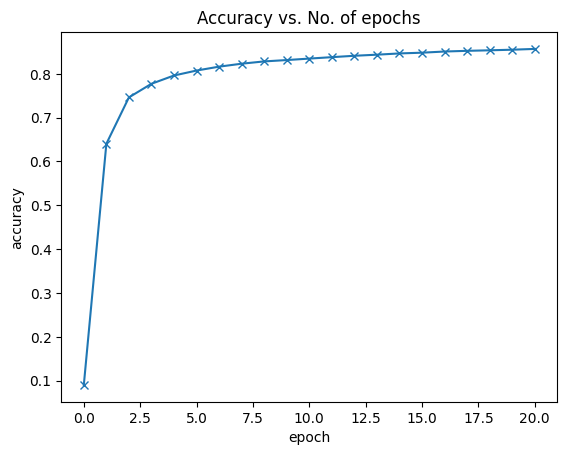

In [52]:
history = [res] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');


TESTING MODEL

In [53]:
test_dataset = MNIST(root='data/',
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


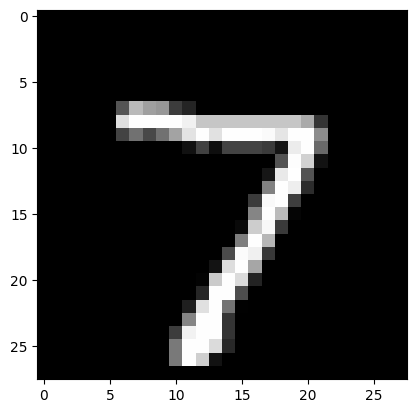

In [54]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [55]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


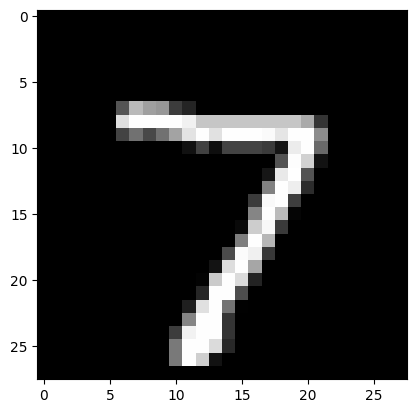

In [56]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 4


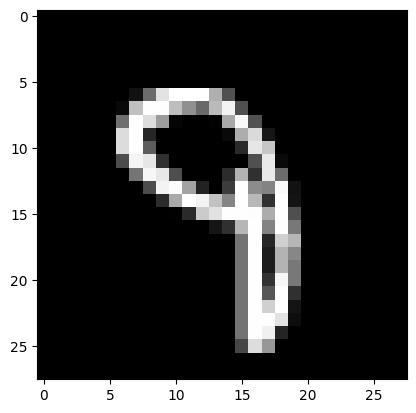

In [57]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [58]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.6396125555038452, 'val_acc': 0.8619140386581421}

In [59]:
torch.save(model.state_dict(), 'mnist-logistic.pth')